In [665]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [666]:
training_data=pd.read_csv('train.csv')
testing_data=pd.read_csv('test.csv')

In [667]:
df=pd.DataFrame(training_data)

In [668]:
df_test=pd.DataFrame(testing_data)

In [669]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [670]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [671]:
missing_values=df.isnull().sum()
print("Missing values on training data")
missing_values

Missing values on training data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [672]:
missing_values2=df_test.isnull().sum()
print("Missing values on testing data")
missing_values2

Missing values on testing data


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Dropping Columns 

In [673]:
#dropping Name, Cabin and ticket column
df=df.drop(['Name','Cabin', 'Ticket'],axis=1)
df_test=df_test.drop(['Name','Cabin','Ticket'],axis=1)

### Handling missing data

In [674]:
#handling missing data for age
df['Age'].fillna(df['Age'].mean(),inplace=True)

df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

In [675]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [676]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [677]:
def Plot(dataset, column):
    category_counts = dataset.groupby(column)['Survived'].sum()
       
    sns.barplot(x=dataset[column], y="Survived", data=dataset)
    plt.title('Survival rate Of ' + column)
    plt.xlabel(column)
    plt.ylabel('Survival Rate (%)')

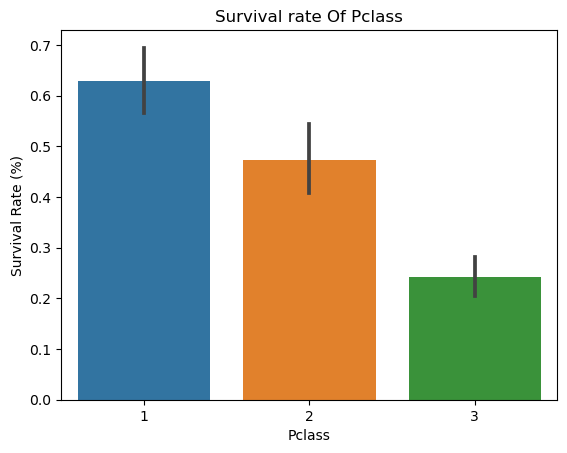

In [678]:
Plot(df,'Pclass')

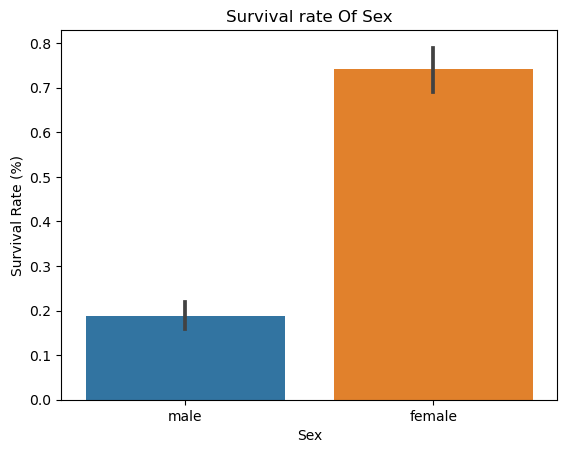

In [679]:
Plot(df,'Sex')

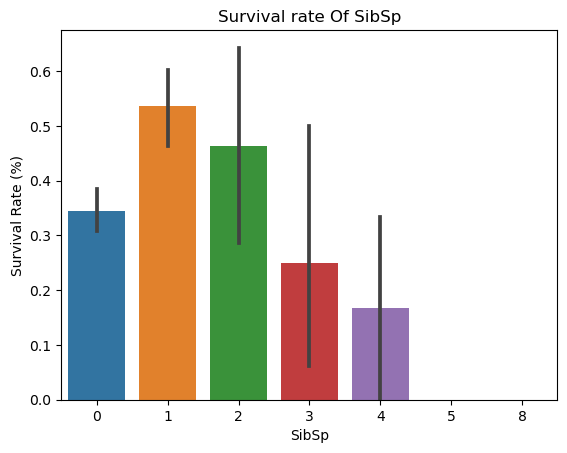

In [680]:
Plot(df,'SibSp')

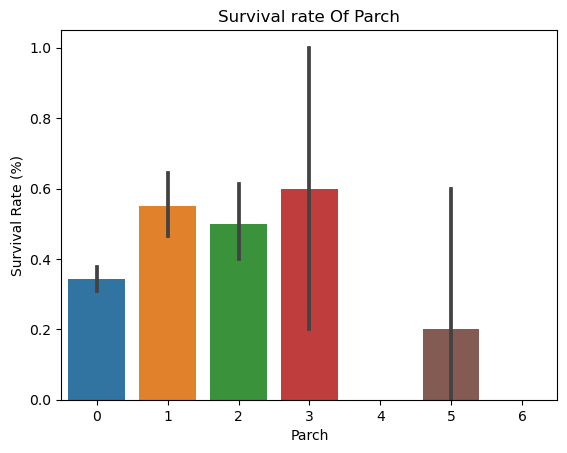

In [681]:
Plot(df,'Parch')

In [682]:
bins=[0,18,30,60,np.inf]
labels=['Child','Adult','Senior','Elderly']
df['AgeGroup']=pd.cut(df['Age'],bins,labels=labels)
df_test['AgeGroup']=pd.cut(df_test['Age'],bins,labels=labels)

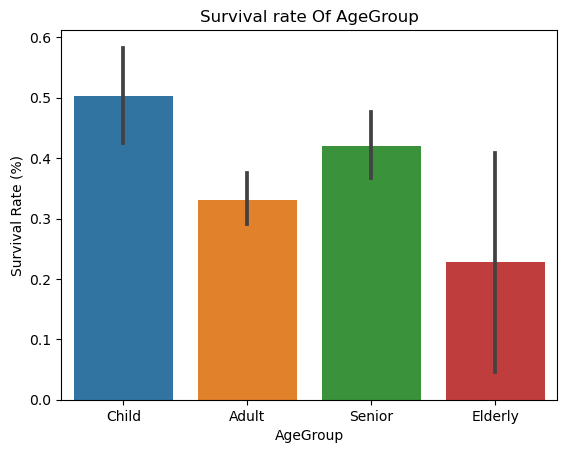

In [683]:
Plot(df,'AgeGroup')

In [684]:
#changing the sex column values to numerical 
sex_mapping={"male":0,"female":1}
df['Sex']=df['Sex'].map(sex_mapping)
df_test['Sex']=df_test['Sex'].map(sex_mapping)

In [685]:
#changing the embarked column values to numerical
embarked_mapping={'S':1,"C":2,"Q":3}
df['Embarked']=df['Embarked'].map(embarked_mapping)
df_test['Embarked']=df_test['Embarked'].map(embarked_mapping)

In [686]:
#filling the missing values 
df['Embarked'].fillna(df['Embarked'].mean(),inplace=True)

df['Embarked']=df['Embarked'].astype(int)

In [687]:
#changing the fare values to categories
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)
df['FareBand']=pd.qcut(df['Fare'],4,labels=[1,2,3,4])
df_test['FareBand']=pd.qcut(df_test['Fare'],4,labels=[1,2,3,4])


In [688]:
df=df.drop(['Fare'], axis=1)
df_test=df_test.drop(['Fare'], axis=1)

In [689]:
#changing the AgeGroup values to numerical
age_mapping={'Child':1,'Adult':2,'Senior':3,'Elderly':4}
df['AgeGroup']=df['AgeGroup'].map(age_mapping)
df_test['AgeGroup']=df_test['AgeGroup'].map(age_mapping)


In [690]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
FareBand       0
dtype: int64


our target here is "Survived" variable, the other features are pclass, sex, Age, SibSp, Parch.

Lets visualize each to make predictions. 

# Training Model

In [691]:
from sklearn.model_selection import train_test_split

predictors=df.drop(['Survived','PassengerId','Age'],axis=1)
target=df['Survived']

In [692]:
ids=df_test['PassengerId']
df_test.drop(['PassengerId','Age'],axis=1, inplace=True)

In [693]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


def RandomForest(k):
    X=predictors
    y=target


    # Initialize KFold
    kf = KFold(n_splits=k, shuffle=True, random_state=0)

    # Initialize an empty list to store evaluation scores
    scores = []

    #convert X to a numPy array
    X=np.array(X)

    # Loop through the folds
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
    
        # Instantiate and train the model
        randomforest=RandomForestClassifier()

        randomforest.fit(X_train, y_train)
    
        # Make predictions
        y_pred = randomforest.predict(X_val)
    
        # Calculate accuracy for this fold
        accuracy = accuracy_score(y_val, y_pred)
    
        # Append the accuracy to the scores list
        scores.append(accuracy)
 
    # Calculate the average accuracy across all folds
    average_accuracy = round((sum(scores) / len(scores)) *100,2)
    
    # Predict on the testing dataset using Random Forest
    rf_predictions = randomforest.predict(df_test)

    # Output the predictions
    rf_output = pd.DataFrame(df_test)
    rf_output['PassengerId']=ids
    rf_output['Survived']= rf_predictions
    rf_output.to_csv('RandomForest_Predictions.csv', index=False)
    return average_accuracy


In [694]:
from sklearn.svm import SVC # Importing SVC for Support Vector Machine

def SVM(k):
    X=predictors
    y=target

   
    # Initialize KFold
    kf = KFold(n_splits=k, shuffle=True, random_state=0)

    # Initialize an empty list to store evaluation scores
    scores = []

    #convert X to a numPy array
    X=np.array(X)

    # Loop through the folds
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
    
       # Instantiate and train the SVM model
        svc = SVC()
        svc.fit(X_train, y_train)

        # Make predictions
        y_pred = svc.predict(X_val)

        # Calculate accuracy for this fold
        accuracy = accuracy_score(y_val, y_pred)

        # Append the accuracy to the scores list
        scores.append(accuracy)

    # Calculate the average accuracy across all folds
    average_accuracy = round((sum(scores) / len(scores)) * 100, 2)
    
    # Predict on the testing dataset using SVM
    svm_predictions = svc.predict(df_test)

    # Output the predictions
    svm_output = pd.DataFrame(df_test)
    svm_output['PassengerId']=ids
    svm_output['Survived']= svm_predictions
    svm_output.to_csv('SVM_Predictions.csv', index=False)
    
    return average_accuracy
    

In [698]:
K = [ (5,'RandomForest'), (6,'RandomForest'), (7,'RandomForest'), (8,'RandomForest'), (5,'SVM'), (6,'SVM'), (7,'SVM'), (7,'SVM')]
Model = []
Accuracy = []

for k in K:
    if k[1] == 'RandomForest':
        Model.append("RandomForest")
        Accuracy.append(RandomForest(k[0]))
        
    elif k[1] == 'SVM':
        Model.append("SVM")
        Accuracy.append(SVM(k[0]))

Dict = {
    "K": [5,6,7,8,5,6,7,8],
    "Model": Model,
    "Accuracy": Accuracy
}
table=pd.DataFrame(Dict)
table1=pd.pivot_table(table,values='Accuracy',index='Model',columns='K')
table1

K,5,6,7,8
Model,,,,
RandomForest,80.13,81.48,80.70,80.70
SVM,81.71,81.48,81.37,81.37


### Random Forest Predictions

In [705]:
rf_output =pd.read_csv('RandomForest_Predictions.csv')


rf_output['AgeGroup'].value_counts()

AgeGroup
3    207
2    146
1     54
4     11
Name: count, dtype: int64

In [706]:
svm_output['AgeGroup'].value_counts()

AgeGroup
3    207
2    146
1     54
4     11
Name: count, dtype: int64

In [707]:
sex_mapping={0:"male",1: "female"}
rf_output['Sex']=rf_output['Sex'].map(sex_mapping)



age_mapping={1:'Child',2:'Adult',3:'Senior',4:'Elderly'}
rf_output['AgeGroup']=rf_output['AgeGroup'].map(age_mapping)



In [708]:
rf_output['AgeGroup'].value_counts()

AgeGroup
Senior     207
Adult      146
Child       54
Elderly     11
Name: count, dtype: int64

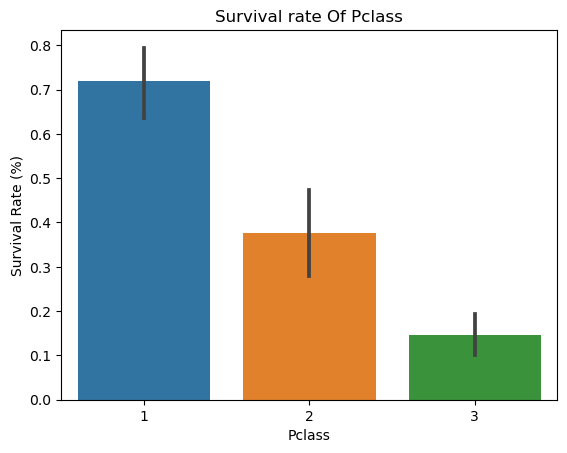

In [640]:
Plot(rf_output,'Pclass')

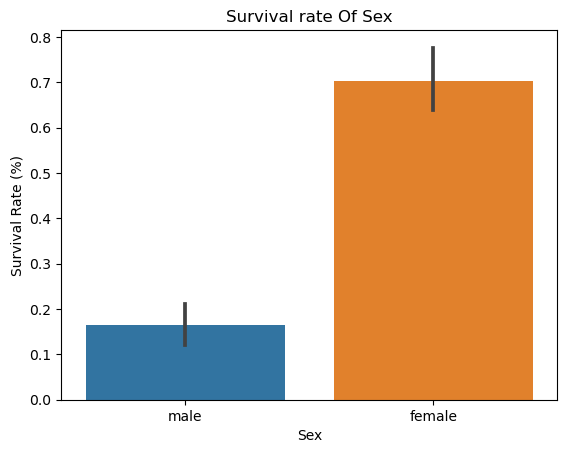

In [709]:
Plot(rf_output,'Sex')

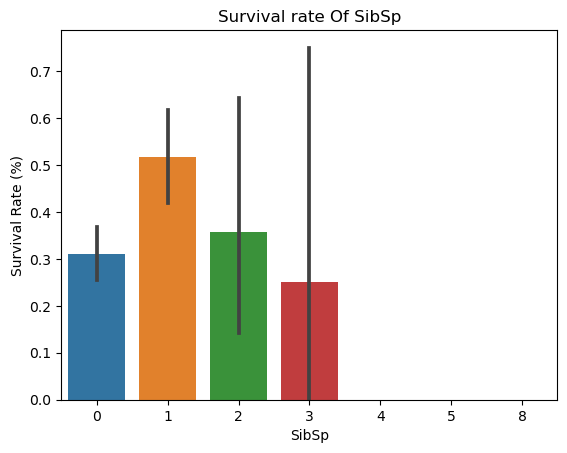

In [710]:
Plot(rf_output,'SibSp')

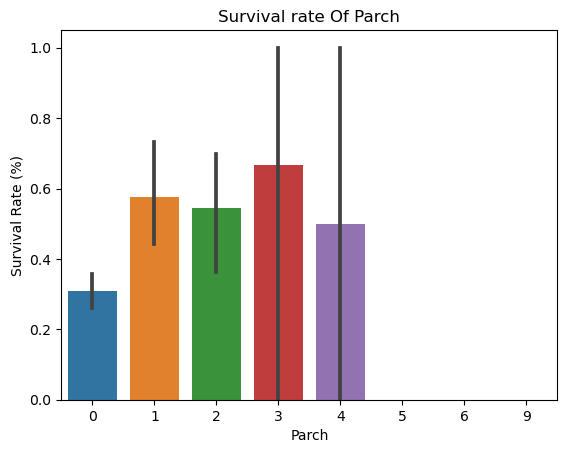

In [711]:
Plot(rf_output,'Parch')

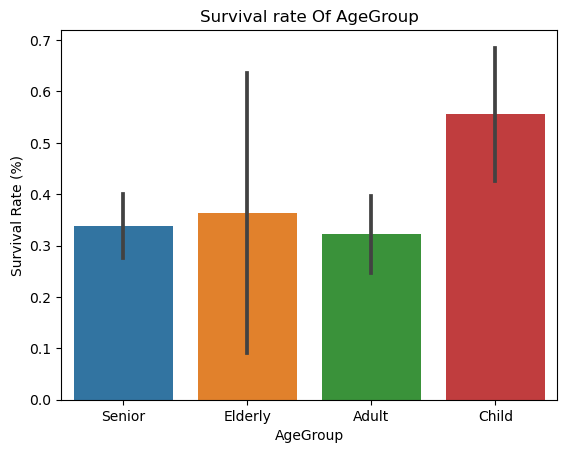

In [712]:
Plot(rf_output,'AgeGroup')

### SVM Predictions

In [717]:
svm_output =pd.read_csv('SVM_Predictions.csv')
svm_output.head()

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareBand,PassengerId,Survived
0,3,0,0,0,3,3,1,892,0
1,3,1,1,0,1,3,1,893,0
2,2,0,0,0,3,4,2,894,0
3,3,0,0,0,1,2,2,895,0
4,3,1,1,1,1,2,2,896,1


In [719]:
svm_output.head()

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareBand,PassengerId,Survived
0,3,male,0,0,3,Senior,1,892,0
1,3,female,1,0,1,Senior,1,893,0
2,2,male,0,0,3,Elderly,2,894,0
3,3,male,0,0,1,Adult,2,895,0
4,3,female,1,1,1,Adult,2,896,1


In [718]:
sex_mapping={0:"male",1: "female"}
svm_output['Sex']=svm_output['Sex'].map(sex_mapping)

age_mapping={1:'Child',2:'Adult',3:'Senior',4:'Elderly'}
svm_output['AgeGroup']=svm_output['AgeGroup'].map(age_mapping)


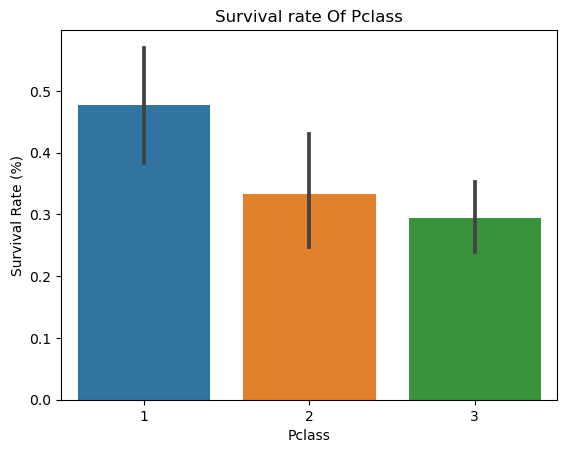

In [720]:
Plot(svm_output,'Pclass')

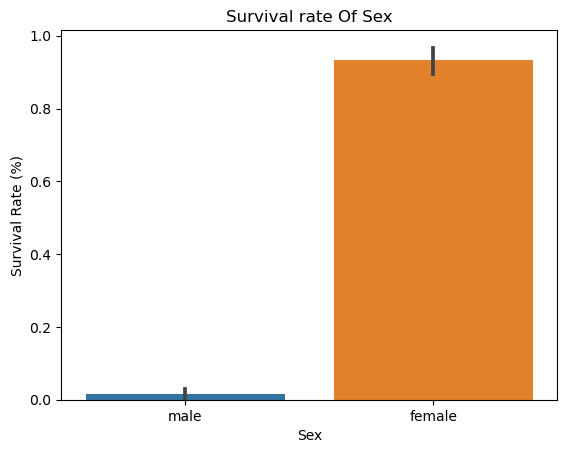

In [721]:
Plot(svm_output,'Sex')

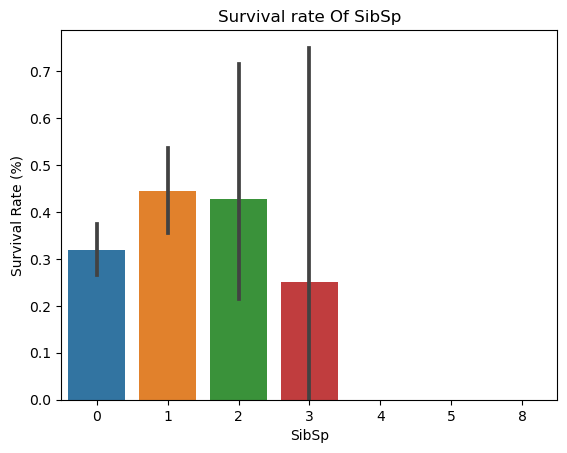

In [722]:
Plot(svm_output,'SibSp')

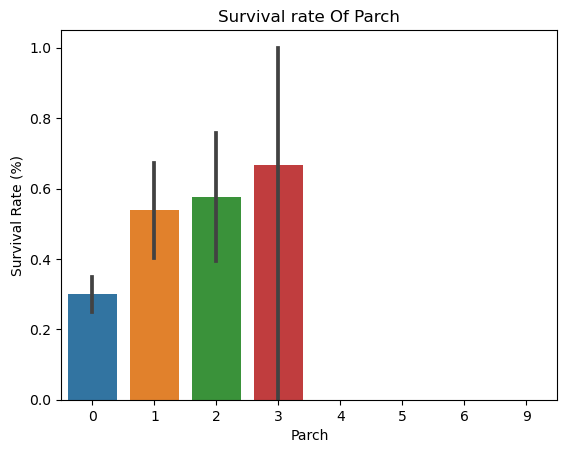

In [723]:
Plot(svm_output,'Parch')

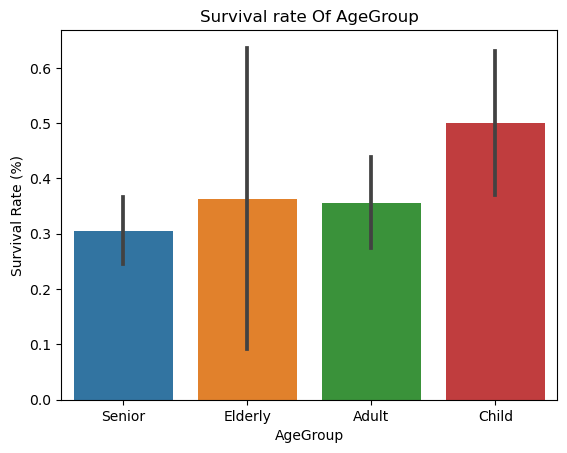

In [724]:
Plot(svm_output,'AgeGroup')